# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Top 3 Underrated Metaverse Crypto Games With a Market Cap Below $5 Million (April 2022).  Low market cap Metaverse crypto games remain among the most popular options for new traders looking to bet on underrated projects that could see significant price gains during the next crypto bull run. Today we look at some exceptionally low market cap Metaverse crypto games with valuations below $5 million to watch in April 2022, [&#8230;]The post Top 3 Underrated Metaverse Crypto Games With a Market Cap Below $5 Million (April 2022) appeared first on NullTX. ... [| Skaityti daugiau](https://nulltx.com/top-3-underrated-metaverse-crypto-games-with-a-market-cap-below-5-million-april-2022/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- The National | COVID holidays, Russian escalation, Canadian Jeopardy! champ.  April 15, 2022 | A stalled booster vaccine rollout adds risk to a long weekend without restrictions. Plus, the Canadian Jeopardy! champ on a winning streak. ... [| Skaityti daugiau](http://www.cbc.ca/player/play/1961983043633) 

### Kainų kaita pandemijos metu

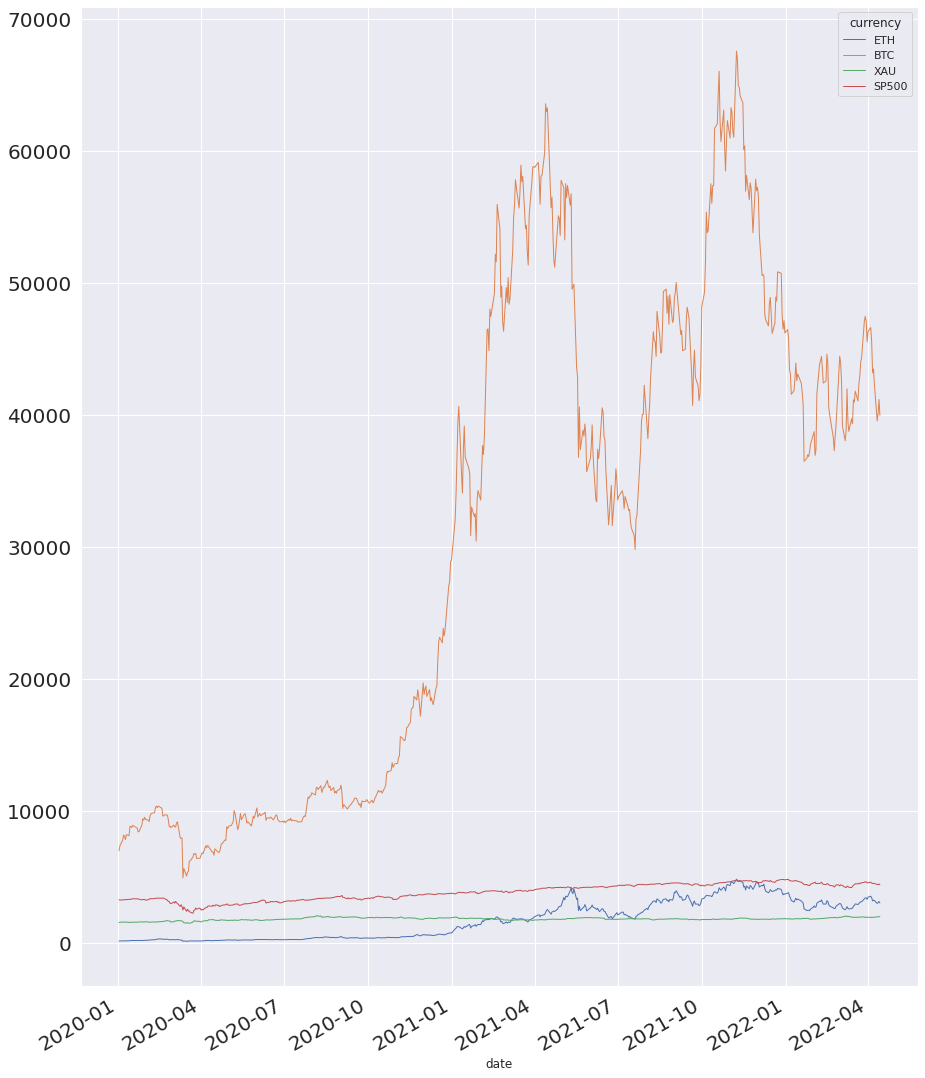

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.904438,0.231284,0.923602
BTC,0.904438,1.000000,0.188752,0.873074
XAU,0.231284,0.188752,1.000000,0.365370
SP500,0.923602,0.873074,0.365370,1.000000


In [8]:
#hide ### Koreliacijos matrica.

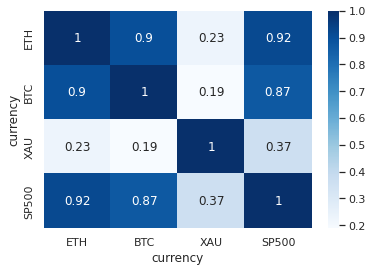

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')